In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [2]:
names_by_year = {}

for year in range(1880, 2019):
    names_by_year[year] = pd.read_csv(
        f'/Users/Maria/Downloads/names/yob{year}.txt',
        names=['name','sex','number']
    )
    
names = pd.concat(names_by_year).reset_index(level=1, drop=True)

**Задача 1.** Построить график изменения количества имен Ruth и Robert с 1900 по 2000

Text(0, 0.5, 'number')

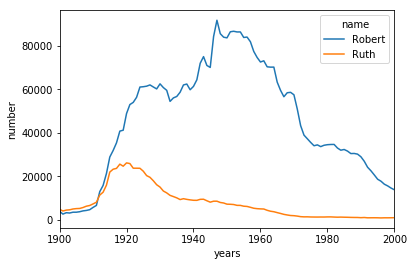

In [3]:
names_1 = names.groupby([names.index, 'name']).sum()
names_1 = names_1.loc[pd.IndexSlice[1900:2000, ['Ruth', 'Robert']],]
names_1 = names_1.unstack('name')
names_1.columns = names_1.columns.droplevel(-2)
names_1.plot()
plt.xlabel('years')
plt.ylabel('number')

In [4]:
trace0 = go.Scatter(
    x=names_1.index,
    y=names_1.Robert,
    name='Robert'
)

trace1 = go.Scatter(
    x=names_1.index,
    y=names_1.Ruth,
    name='Ruth'
)
  
data = [trace0, trace1]
layout = {'title': 'Some names dynamics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Задача 2.** Построить столбчатую диаграмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

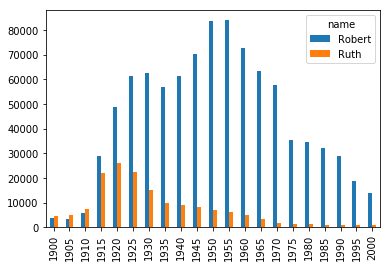

In [5]:
names_2 = names_1[0::5]
names_2.plot(kind='bar')

In [6]:
trace0 = go.Bar(
    x=names_2.index,
    y=names_2.Robert,
    name='Robert'
)

trace1 = go.Bar(
    x=names_2.index,
    y=names_2.Ruth,
    name='Ruth'
)
  
data = [trace0, trace1]
layout = {'title': 'Some names dynamics'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**Задача 3.** Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

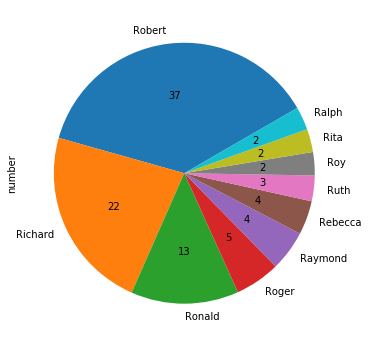

In [7]:
names_3 = names.loc['1950'].sort_values('number', ascending=False)
names_3 = names_3[names_3.name.str.startswith('R')].head(10).set_index(['name'])

names_3.plot(kind='pie', y='number', startangle=30, autopct='%d', figsize=(6, 6), legend=False)

**Задача 4.** Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [8]:
names_4 = names.loc[range(1900,2001)]
names_4 = names_4.groupby(['name']).sum()
names_4.reset_index(inplace=True)

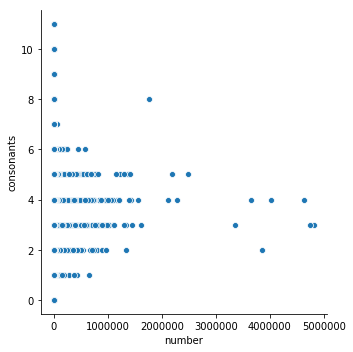

In [9]:
vowels = list('AEIOUYaeiouy')
names_4['consonants'] = names_4.apply(lambda x: sum(i not in vowels for i in x['name']), axis=1)

sns.relplot(x='number', y='consonants', data=names_4)